# Tutorial #2: Creating Network Finite State Machines from a Boolean Gene Regulatory Network Model 

Welcome to the second tutorial demonstrating how to utilize the Regulatory Network Machine framework with Gene Regulatory Network models, as outlined in our 
paper, [Harnessing the Analogue Computing Power of Regulatory Networks with the Regulatory Network Machine](https://osf.io/preprints/osf/tb5ys_v1).

Here we demonstrate how to create Network Finite State Machines (NFSMs) from a Boolean, logic-based Gene Regulatory Network (GRN) model. Here we use the [MAPK Cancer Cell Fate Network](https://research.cellcollective.org/dashboard#module/7984:1/mapk-cancer-cell-fate-network/1) created by [Grieco et. al - 2017](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003286), sourced from the [Cell Collective](https://cellcollective.org/) database. This example GRN model is quite valuable, as it enables work with NFSMs in a cancer renormalization strategy. In the Boolean model, the expression state (as True = 1 or False = 0) of each node was prescribed by logic equations, which represent the activation or inhibition interactions of the expression of one node upon the expression of another. 

Here we specifically run-through the following steps to arrive at NFSMs:
1. We show how to load the GRN from the Cellnition network library, where the [MAPK_net](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_library.py#L2277) is loaded from the Cellnition network library into a [BooleanNet](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L25) class and the network is built using the [build_network_from_edges method](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L89) of the BooleanNet. We characterize the network, determining cycles, node input and output degree, node hierarchical level (see [Moutsinas et. al - 2021](https://www.nature.com/articles/s41598-021-93161-4)), etc, using the [characterize_graph](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L214) method of BooleanNet), and generate visualizations for the GRN as a network diagram using [plot_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/netplot.py#L8). We note that other networks can be loaded from the Cellnition [network library](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_library.py#L1) that readily work with the BooleanNet solver. We also note that nodes of the network have been automatically categorized as inputs, outputs, and internal nodes when the 'characterize_graph' method is utilized. 
2. We show how to use the loaded GRN to automatically construct an analytical Boolean model consisting of logical expressions describing node expressions using the [build_boolean_model](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L111) method of BooleanNet. We show how to visualize and export these equations for use in publications and reports using the [save_model_equations](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L754) method of BooleanNet.
3. We next instantiate the [BoolStateMachine](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) class, and use the Boolean model of the GRN with the [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) object to search for equilibrium states of the GRN system for each member of the set of possible input states using the [steady_state_solutions_search](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L166) method of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26). These equilibrium states are automatically subjected to a characterization to determine their dynamic quality (e.g. as a point attractor, metastable saddle, or continuously oscilating limit cycle, etc, see the code in the [net_state_compute](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L342) method of BooleanNet for details). Finally, we show how to write export a visualization of the matrix of unique equilibrium states using the [plot_sols_array](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L652) method of BooleanNet.
4. We show how to run the state-machine construction routine, [create_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L258) of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26), to build both of the NFSM types for the Boolean GRN model.
5. We define output states representing the idealized cases of cell outcomes such as "cancer", "senecence" or "normal" status, and use these idealized output vectors to compare how far the detected eq'm states of the system are to the idealized output (e.g. by calculating the Euclidean distance between an eq'm state of the GRN and the idealized cancer state vector. We next show how to save the NFSM graphs, and to use the [plot_state_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L490) method of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) to plot the 'general' NFSM (G-NFSM) and the [plot_state_perturbation_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L490) method of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) to plot the event-driven NFSM (E-NFSM).
6. Finally, we show how to test the results of the NFSMs by running pseudo-time-based simulations (sequence simulations on the Boolean model) where a particular sequence of applied inputs is used to drive the system through the NFSM, where stable states are automatically detected and matched by the Cellnition program. We do this using the [sim_sequence_trajectory]() method of BoolStateMachine. We show how the BoolStateMachine method [plot_sequence_trajectory]() can be used to visualize the results of the pseudo-temporal simulation.   

In [1]:
import os
import csv
import copy
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import colors
from matplotlib import colormaps
import networkx as nx

from cellnition.science.network_models.network_enums import (EdgeType, 
                                                             GraphType, 
                                                             NodeType, 
                                                             InterFuncType, 
                                                             CouplingType, 
                                                             EquilibriumType
                                                            )
# from cellnition.science.network_workflow import NetworkWorkflow
from cellnition.science.networks_toolbox.netplot import plot_network

from cellnition.science.network_models.network_library import MAPK_net

from cellnition.science.network_models.boolean_networks import BooleanNet
from cellnition.science.networks_toolbox.boolean_state_machine import BoolStateMachine

### Step 1: Loading and ploting the GRN network

We show how to load the GRN from the Cellnition network library, where the [MAPK_net](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_library.py#L2277) is loaded from the Cellnition network library into a [BooleanNet](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L25) class and the network is built using the [build_network_from_edges method](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L89) of the [BooleanNet](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/boolean_networks.py#L25). We characterize the network, determining cycles, node input and output degree, node hierarchical level (see [Moutsinas et. al - 2021](https://www.nature.com/articles/s41598-021-93161-4)), etc, using the [characterize_graph](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L214) method of [BooleanNet](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/boolean_networks.py#L25)), and generate visualizations for the GRN as a network diagram using [plot_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/netplot.py#L8). We note that other networks can be loaded from the Cellnition [network library](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_library.py#L1) that readily work with the [BooleanNet](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/boolean_networks.py#L25) solver. We also note that nodes of the network have been automatically categorized as inputs, outputs, and internal nodes when the [characterize_graph](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/network_abc.py#L214) method is utilized. 

In [2]:
# Save path for images and graphs:
save_path_base = '/home/pietakio/Documents/CellnitionSims/Boolean' # YOUR CUSTOM ROOT DIRECTORY HERE! 
save_path_oo = os.path.join(save_path_base, 'March21_2025')
if not os.path.isdir(save_path_oo):
    os.makedirs(save_path_oo)

In [3]:
# load the network base from the Cellnition library:
libg = MAPK_net()

# Specify how to combine multiple nodes interacting together:
multi_coupling_type = CouplingType.mix1 # activators combine as "OR" and inhibitors "AND"
# multi_coupling_type = CouplingType.additive # everything "OR"
# multi_coupling_type = CouplingType.multiplicative # everything "AND"
# multi_coupling_type = CouplingType.mix2  # activators combine "AND" and inhibitors "OR"

constitutive_express = False # activators present "AND" inhibitors absent for expression, when "False"

# NOTE: Mix1 is the default combinatory strategy. CouplingType.mix1 combines multiple activators in an "OR" fashion (additive) and 
# multiple inhibitors in an "AND" fashion (multiplicative). This combinatory strategy specifies that individual activators have 
# equal influence on the downstream gene activation, whereas all inhibitors must be absent for gene activaton and the pressense of
# a single inhibitor can cease all downstream gene expression of the downstream node. 

# Furthermore, in the Boolean model, constitutive_express = False combines the set of all activators and the set of all inhibitors 
# in a multiplicative "AND" fashion, which states: the effect of activators must
# be present AND all inhibitors must be absent for gene expression at the downstream node. This has the exception that if a node only has
# inhibitors acting on it, it is assumed to have constitutive expression, such that only the absense of the inhibitors is required for 
# expression. These conventions are considered the standard heuristic in Boolean network models (see Schwab et al. - 2020).

In [4]:
bnet = BooleanNet() # Instantiate the Boolean GRN network solver
bnet.build_network_from_edges(libg.edges) # Build the basic graph/network from the imported MAPK_net library network 
bnet.characterize_graph() # Characterize the graph and set key parameters
bnet.set_node_types() # Set the node types to a default value

bnet.set_edge_types(libg.edge_types) # set the edge types to those defined in the MAPK_net network

In [5]:
# Use the above-specified options to define a final sub-directory for the results:
save_path_o = os.path.join(save_path_oo, f'_{multi_coupling_type.name[0:4]}')
if not os.path.isdir(save_path_o):
    os.makedirs(save_path_o)

# Final save directory is for the individual network that is being studied: 
save_path = os.path.join(save_path_o, f'{libg.name}' )
if not os.path.isdir(save_path):
    os.makedirs(save_path)

# Set some easily-modifiable text parameters for plots: 
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fimg = '.png' # Format for exported graph images. Can use '.png' for bitmap or '.svg' for vector graphics. 

In [6]:
# save plots of the GRN graph:
# Shared parameters used on the following graph images:
arrowsize = 2.0 # Size of the directed head of the graph edges (relative units) 
node_font_size = 24 # Size of the font used on node labels
net_font_name =  'DejaVu Sans Bold' # name of font used on node labels
edge_width = 2.0 # with of interaction edges
nde_outline = 'Black' # colour of the node outline (if no outline is desired use "None")
rev_font_color = False # Reverse the color of node text? It is black by default. 
label_edges=False # Label the edges with their index in the ProbabilityNet, pnet? 

# NOTE: label_edges=True is useful in inspection and validation of equations, as the 
# edge index is also the index of 'n_base' and 'bb' params, above (the 'dd' param is labeled to node index). 

# The network shown in a hierarchical layout with node color representing the "hierarchical level" of the node
# as calculated in 'characterize_graph' and described in Moutsinas et. al - 2021: 
graph_net_hier = f'hier_graph_{libg.name}{fimg}' 
save_graph_net_hier = os.path.join(save_path, graph_net_hier)

gp=plot_network(bnet.nodes_list,
                bnet.edges_list,
                bnet.node_types,
                bnet.edge_types,
                node_vals = bnet.hier_node_level, # color the nodes to their hierarchical level
                val_cmap = 'viridis_r',
                save_path=save_graph_net_hier,
                layout='dot',
                rev_font_color=rev_font_color,
                label_edges=label_edges,
                net_font_name=net_font_name,
                node_font_size=node_font_size,
                edge_width=edge_width,
                nde_outline=nde_outline,
                arrowsize=arrowsize
                )

# The network shown in a circular layout with nodes colored acording to whether they are present in cycles or not:
graph_net_circ = f'circ_graph_{libg.name}{fimg}'
save_graph_net_circo = os.path.join(save_path, graph_net_circ)   

cycle_tags = np.zeros(bnet.N_nodes)
cycle_tags[bnet.nodes_in_cycles] = 1.0

gp=plot_network(bnet.nodes_list,
                bnet.edges_list,
                bnet.node_types,
                bnet.edge_types,
                node_vals = cycle_tags,
                val_cmap = 'Blues',
                save_path=save_graph_net_circo,
                layout='circo',
                rev_font_color=rev_font_color,
                label_edges=label_edges,
                net_font_name=net_font_name,
                node_font_size=node_font_size,
                edge_width=edge_width,
                nde_outline=nde_outline,
                arrowsize=arrowsize
                )

## Step 2: Create the analytic simulation model for the GRN network

We show how to use the loaded GRN to automatically construct an analytical Boolean model consisting of logical expressions describing node expressions using the [build_boolean_model](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L111) method of [BooleanNet](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/boolean_networks.py#L25). We show how to visualize and export these equations for use in publications and reports using the [save_model_equations](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L754) method of [BooleanNet](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/boolean_networks.py#L25).

In [7]:
# Use the network/graph characteristics to build a Boolean network solver for the GRN:
c_vect_s, A_bool_s, A_bool_f = bnet.build_boolean_model(use_node_name=True,
                                                      multi_coupling_type=multi_coupling_type,
                                                     constitutive_express=constitutive_express)

In [8]:
# Inspect the gene variables list:
c_vect_s

Matrix([
[           AKT],
[           AP1],
[          ATF2],
[           ATM],
[     Apoptosis],
[          BCL2],
[          CREB],
[    DNA_damage],
[         DUSP1],
[          EGFR],
[ EGFR_stimulus],
[          ELK1],
[           ERK],
[         FGFR3],
[FGFR3_stimulus],
[           FOS],
[         FOXO3],
[          FRS2],
[          GAB1],
[        GADD45],
[          GRB2],
[ Growth_Arrest],
[           JNK],
[           JUN],
[      MAP3K1_3],
[           MAX],
[          MDM2],
[        MEK1_2],
[           MSK],
[          MTK1],
[           MYC],
[          PDK1],
[          PI3K],
[           PKC],
[          PLCG],
[        PPP2CA],
[          PTEN],
[ Proliferation],
[           RAF],
[           RAS],
[           RSK],
[          SMAD],
[           SOS],
[          SPRY],
[          TAK1],
[          TAOK],
[         TGFBR],
[TGFBR_stimulus],
[           p14],
[           p21],
[           p38],
[           p53],
[           p70]])

In [9]:
# Inspect the generative equations for this Boolean model:
A_bool_s

Matrix([
[                                    PDK1*(1 - PTEN)],
[                             ATF2/3 + FOS/3 + JUN/3],
[                                      JNK/2 + p38/2],
[                                         DNA_damage],
[             (1 - BCL2)*(1 - ERK)*(FOXO3/2 + p53/2)],
[                                     AKT/2 + CREB/2],
[                                                MSK],
[                                                  0],
[                                               CREB],
[    (1 - GRB2)*(1 - PKC)*(EGFR_stimulus/2 + SPRY/2)],
[                                                  0],
[                              ERK/3 + JNK/3 + p38/3],
[                                             MEK1_2],
[                FGFR3_stimulus*(1 - GRB2)*(1 - PKC)],
[                                                  0],
[                    CREB/4 + ELK1/4 + ERK/4 + RSK/4],
[                                      JNK*(1 - AKT)],
[                        FGFR3*(1 - GRB2)*(1 - SPRY)],
[

## Step #3: Generate State Machine Solver

We next instantiate the [BoolStateMachine](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) class, and use the Boolean model of the GRN with the [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) object to search for equilibrium states of the GRN system for each member of the set of possible input states using the [steady_state_solutions_search](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L166) method of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26). These equilibrium states are automatically subjected to a characterization to determine their dynamic quality (e.g. as a point attractor, metastable saddle, or continuously oscilating limit cycle, etc, see the code in the [net_state_compute](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/boolean_networks.py#L342) method of [BooleanNet](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/boolean_networks.py#L25) for details). Finally, we show how to write export a visualization of the matrix of unique equilibrium states using the [plot_sols_array](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/network_models/network_abc.py#L652) method of [BooleanNet](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/network_models/boolean_networks.py#L25).

In [10]:
# Create the Finite State Machine solver for this system using the StateMachine class.
# NOTE: for the large MAPK_net model, this will take a few minutes to solve. 
bsm = BoolStateMachine(bnet)

verbose = False # Do you wish to see output from the solvers? NOTE: for the MAPK_net this can be extensive...
main_nodes_only = True  # Search only the main (internal) nodes of the network and exclude the output nodes (True)? 
node_num_max=12 # If doing search_main_nodes_only = True, choose only the top node_num_max number of nodes to define the state space? 
output_nodes_only = True # When determining unique solutions, consider only the output node values (True) or use all nodes (False)?
n_max_steps = len(bnet.main_nodes)*2 # Specify the number of iterations that the Boolean GRN solver will use to find an eq'm state (recommend 2x node number). 


(solsM_all, 
 charM_all, 
 sols_list, 
 states_dict, 
 sig_test_set) = bsm.steady_state_solutions_search(verbose=verbose,
                                      search_main_nodes_only=main_nodes_only,
                                      n_max_steps=n_max_steps,
                                      order_by_distance=False,
                                      node_num_max=node_num_max,
                                      output_nodes_only=output_nodes_only
                                      )

#### Understanding the outputs:
- *solsM_all* : this is a numpy array with all unique equilibrium solutions stored as columns.
- *charM_all* : the is the corresponding characterization of each equilibrium solution in solsM_all
- *sols_list* : this is a list of all equilibrium solutions found (not generally used)
- *states_dict* : this is a dictionary with keys equal to the input state vector, and a list of found eq'm states (columns of solsM_all). 
- *sig_test_set* : this is the complete set of input states that are utilized in the eq'm state searches. They are pnet.input_node_inds.

Note: in the Boolean model, one might expect all solutions to be 0 or 1. However, we have found that periodic solutions are synonymous with the limit cycles of a fully continuous model, and that taking the average of all states in the period of the cyclic solution produces the analogous result that is obtained in eq'm searches of the fully continuous model. 

In [11]:
# Save the input states to a csv file:
save_inputss_data = os.path.join(save_path, f'InputStates_{libg.name}.csv')
# headr = [f'{ni},' for ni in np.asarray(smach.Receptor tyrosine kinases_pnet.nodes_list)[smach._pnet.input_node_inds]]
np.savetxt(save_inputss_data, sig_test_set, 
           delimiter=',', header='')

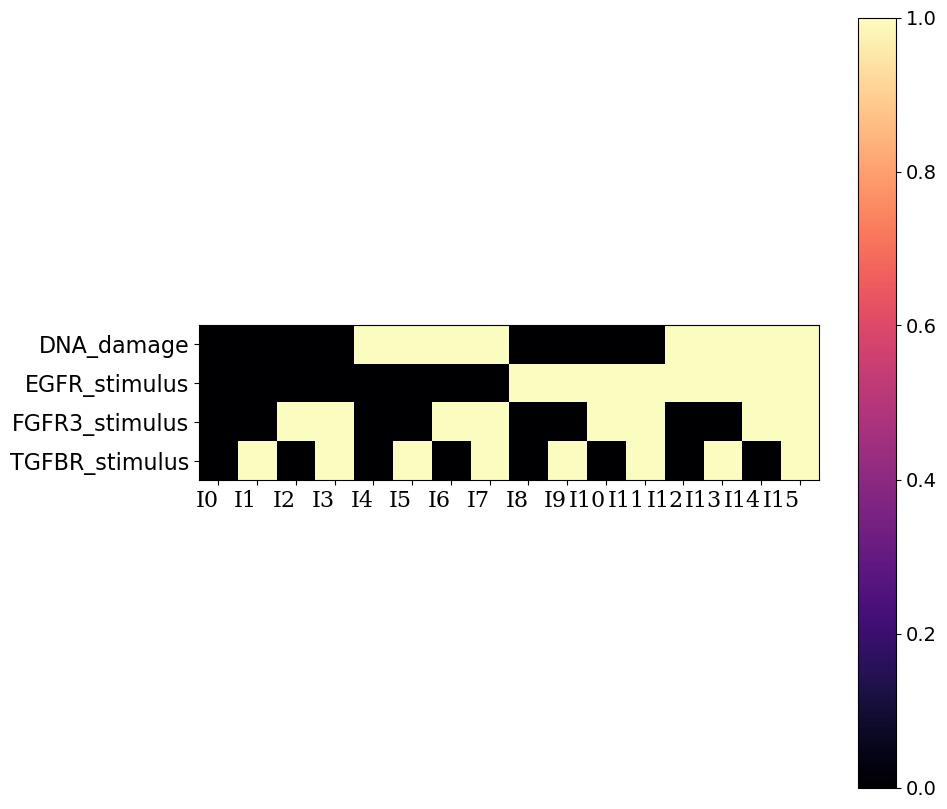

In [12]:
# Plot the set of input states. These are applied to the GRN system in order to drive transitions between stable eq'm states.
y_input_labels = [bnet.nodes_list[ni] for ni in bnet.input_node_inds]
x_input_labels = [f'I{ni}' for ni, _ in enumerate(sig_test_set)]

save_inputs_image = os.path.join(save_path, f'InputStates_{libg.name}_smach.png')
fig, ax = bnet.plot_pixel_matrix(sig_test_set.T,
                          x_input_labels,
                           y_input_labels,
                         figsave=save_inputs_image,
                         cmap=None,
                               figsize=(10,10),
                               fontsize=16
                         )

In [13]:
# See the number of unique solutions as the number of columns (here there are 15 unique eq'm solutions for the 53 nodes of the GRN):
solsM_all.shape

(53, 15)

In [14]:
# See the eq'm state dynamic characterizations for each of the 15 eq'm states of solsM_all: 
charM_all

array([<EquilibriumType.attractor: 0>, <EquilibriumType.saddle: 3>,
       <EquilibriumType.limit_cycle: 2>, <EquilibriumType.limit_cycle: 2>,
       <EquilibriumType.limit_cycle: 2>, <EquilibriumType.limit_cycle: 2>,
       <EquilibriumType.limit_cycle: 2>, <EquilibriumType.limit_cycle: 2>,
       <EquilibriumType.limit_cycle: 2>, <EquilibriumType.limit_cycle: 2>,
       <EquilibriumType.limit_cycle: 2>, <EquilibriumType.limit_cycle: 2>,
       <EquilibriumType.limit_cycle: 2>, <EquilibriumType.limit_cycle: 2>,
       <EquilibriumType.limit_cycle: 2>], dtype=object)

In [15]:
# Save the eq'm solution results matrix to a text file:
save_sols_data = os.path.join(save_path, f'SolsM_{libg.name}.csv')
np.savetxt(save_sols_data, solsM_all[bnet.noninput_node_inds, :], delimiter=',', header='')

(<Figure size 2000x2000 with 2 Axes>, <Axes: >)

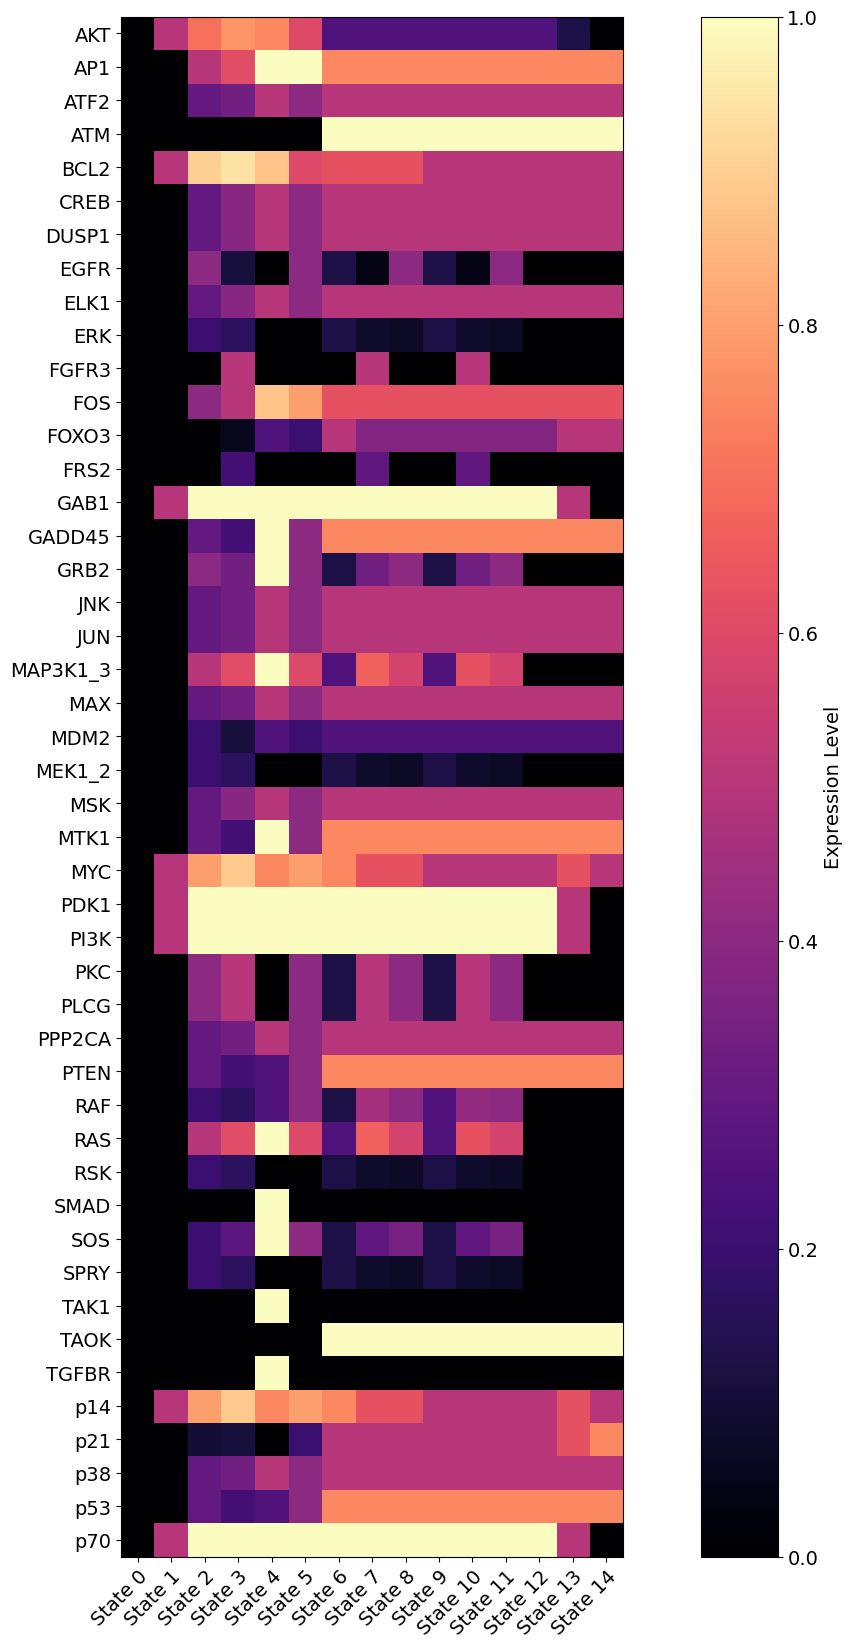

In [16]:
# View and save all eq'm solutions results matrix over all nodes of the GRN (excluding the input nodes) to an image file:
bool_sols_c = f'bool_solM_{libg.name}.png'
save_bool_sols = os.path.join(save_path, bool_sols_c) 

bnet.plot_sols_array(solsM_all,
                        gene_inds = np.setdiff1d(bnet.main_nodes, bnet.output_node_inds),
                        figsave=save_bool_sols,
                        cmap = None,
                        save_format = 'png',
                        figsize = (20, 20))


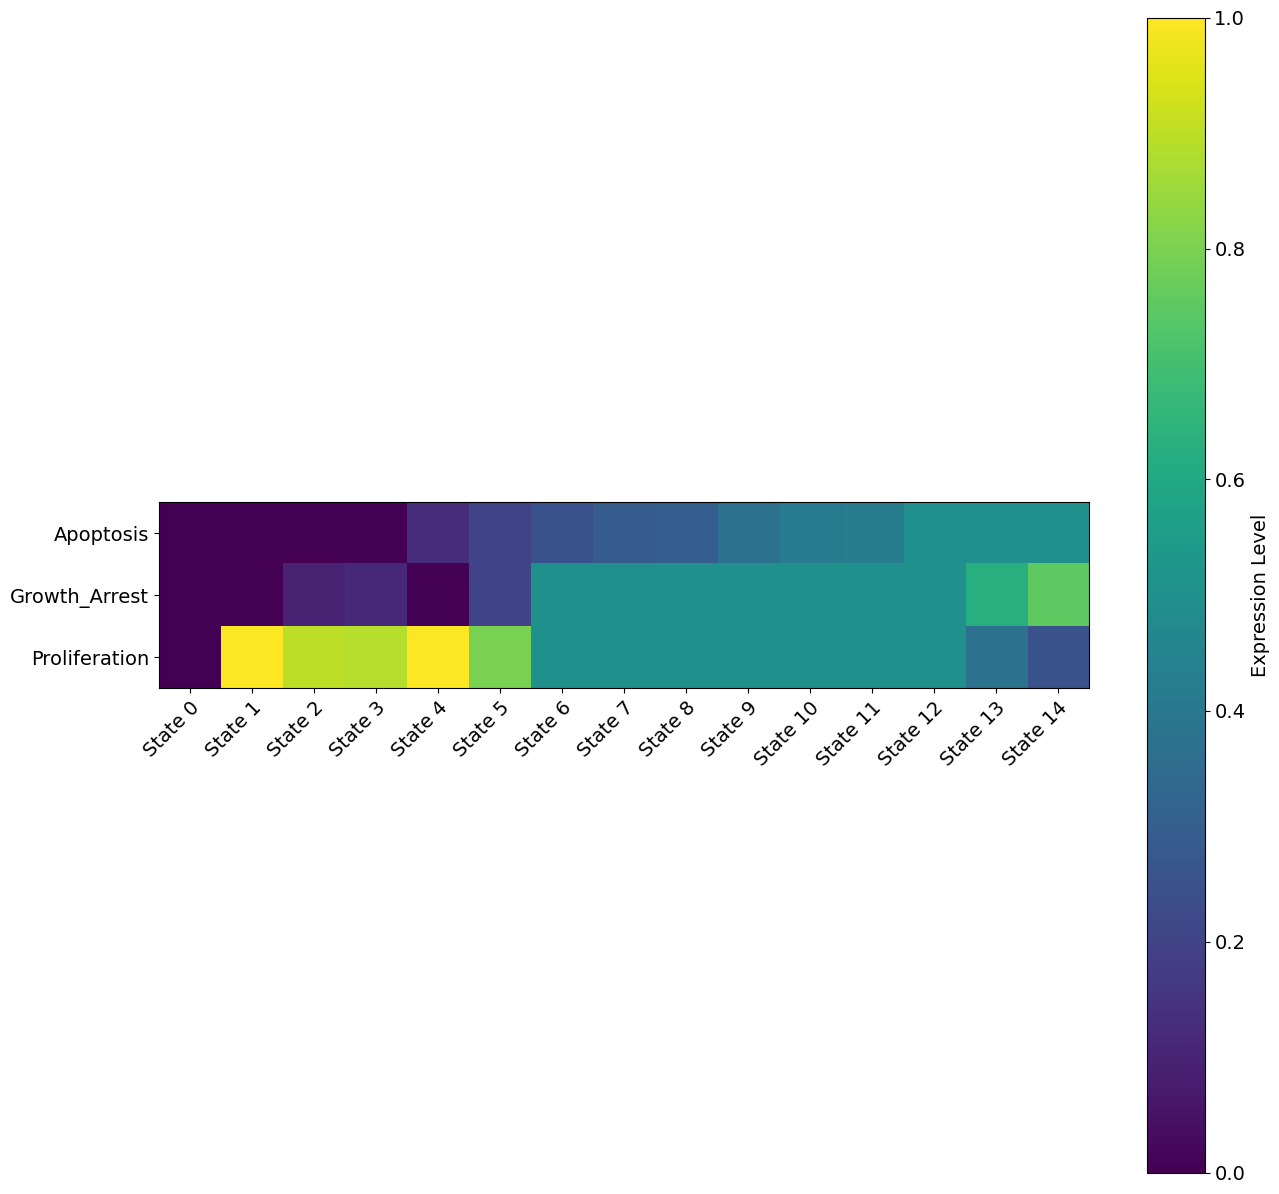

In [17]:
# View and save all eq'm solutions results, from the perspective of the output nodes, to a matrix to an image file:
if len(bnet.output_node_inds): # Not all GRNs have zero-out-degree output nodes so we need to check to see if they exist
    bool_sols_c = f'bool_out_solM_{libg.name}.png'
    save_bool_sols = os.path.join(save_path, bool_sols_c) 

    bnet.plot_sols_array(solsM_all,
                            gene_inds = bnet.output_node_inds,
                            figsave=save_bool_sols,
                            cmap = 'viridis',
                            save_format = 'png',
                            figsize = (15, 15))

### Step 4: Creating the NFSM edges

We show how to run the state-machine construction routine, [create_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L258) of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26), to build both of the NFSM types for the Boolean GRN model.

In [18]:
# Create the edges of the transition network:
verbose = False # Recieve output from the method while it's still solving (True)? # NOTE: for large GRNs this output can be enormous!  
save_graph_file = os.path.join(save_path, f'GNFSM_{libg.name}.gml') # path to save the GNFSM edges file: 

gNFSM_edges_set, eNFSM_edges_set, GG = bsm.create_transition_network(
                                  states_dict,
                                  sig_test_set,
                                  solsM_all,
                                  charM_all,
                                  verbose = verbose,
                                  remove_inaccessible_states=False,
                                  save_graph_file = save_graph_file,
                                  n_max_steps=n_max_steps,
                                  output_nodes_only=output_nodes_only
                                  )

#### Understanding the outputs

- transition_edges_set : tuples recording transitions from eq'm state i to eq'm state j under input state k
- pert_edges_set : tuples recording path-dependent transitions from eq'm state i to eq'm state j under transient input state k and held context input state l
- G_nx : networkx MultiDiGraph object representing the transition_edges_set (i.e. the G-NFSM)

## Step 5: Define idealized physiological states referencing cell conditions & plot NFSMs

We define output states representing the idealized cases of cell outcomes such as "cancer", "senecence" or "normal" status, and use these idealized output vectors to compare how far the detected eq'm states of the system are to the idealized output (e.g. by calculating the Euclidean distance between an eq'm state of the GRN and the idealized cancer state vector. We next show how to save the NFSM graphs, and to use the [plot_state_transition_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L490) method of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) to plot the 'general' NFSM (G-NFSM) and the [plot_state_perturbation_network](https://github.com/betsee/cellnition/blob/46601f3294d9f14cc87d25aa12ed09215fec6114/cellnition/science/networks_toolbox/boolean_state_machine.py#L490) method of [BoolStateMachine](https://github.com/betsee/cellnition/blob/eceb030c3359fa891943a550603bd20bbd551bba/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) to plot the event-driven NFSM (E-NFSM).  

In [19]:
# Take a look at node identity and order of output node inds:
np.asarray(bnet.nodes_list)[bnet.output_node_inds]

array(['Apoptosis', 'Growth_Arrest', 'Proliferation'], dtype='<U14')

In [20]:
# Next, define phenomenological biological states based on the individual outputs:
cancer_state_A = [0.0, 0.0, 1.0] # High proliferation with no apoptosis
cancer_state_B = [0.0, 0.5, 1.0] # High proliferation, no apoptosis, but with growth arrest
senescence_phenotype = [0.0, 1.0, 0.0] # High growth arrest, minimal everything else 
normal_cell_A = [0.5, 0.5, 0.5] # "Balanced" normal/healthy cell state 
normal_cell_B = [0.5, 0.0, 0.5] # "Balanced" normal/healthy cell state 
indeterminite_cell_state = [0.0, 0.0, 0.0] # Undetermined cell state

test_state = cancer_state_A # We're going to define the cancer_state_A as our state of concern

test_inds = bnet.output_node_inds # Output inds represent the nodes that we're testing with respect to

# Now, let's find the best match in the state matrix for each of these:
match_state, match_error = bsm._find_state_match(bsm._solsM_all[test_inds, :], test_state)

cancer_metric_list = [] # list that will hold measures of eq'm state "distance" to the cancer state 
for state_i in bsm._solsM_all[test_inds, :].T:
    cancer_metric_list.append(np.linalg.norm(state_i - cancer_state_A))


In [21]:
# Now we can see the eq'm state indices in order from most cancer-similar to least cancer-similar:
np.argsort(cancer_metric_list)

array([ 1,  4,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12,  0, 13, 14])

In [22]:
# Visually affirm that the above state ordering is indeed arranged with respect to the cancer_state_A:
state_i = 4
solsM_all[bnet.output_node_inds, state_i]

array([0.125, 0.   , 1.   ])

In [23]:
# Plotting and saving the gNFSM and eNFSM:
# This time we color-code the nodes of the NFSMs to show their distance from the cancer_state_A (where red is closest, blue is most distant)
mono_edge = False

nodes_list = list(GG.nodes())
edges_list = list(GG.edges)


if mono_edge is True:
    mono_lab = 'monoedge'
else:
    mono_lab = 'multiedge'


save_transition_net_image = os.path.join(save_path, f'G_NFSM_{libg.name}_' + mono_lab + fimg)
G_gv = bsm.plot_state_transition_network(nodes_list,
                                                      edges_list,
                                                      bsm._charM_all,
                                                      save_file=save_transition_net_image,
                                                      graph_layout='dot',
                                                      mono_edge=True,
                                                      constraint= True,
                                                       concentrate = False,
                                                      node_colors=cancer_metric_list,
                                                      rank='same',
                                                      cmap_str='RdBu',
                                                      transp_str='60'
                                         
                                                      )


save_perturbation_net_image = os.path.join(save_path, f'E_NFSM_{libg.name}_' + mono_lab + fimg)
G_pert = bsm.plot_state_perturbation_network(eNFSM_edges_set,
                                               bsm._charM_all,
                                               nodes_listo=nodes_list,
                                               save_file=save_perturbation_net_image,
                                              graph_layout='dot',
                                              mono_edge=mono_edge,
                                              constraint= True,
                                              concentrate = False,
                                             node_colors=cancer_metric_list,
                                              cmap_str='RdBu',
                                                transp_str='60',
                                               rank='same'
                                              )

## Step 6: Test the NFSM predictions using pseudo-time stepping sequences   
Finally, we show how to test the results of the NFSMs by running pseudo-time-based simulations (sequence simulations on the Boolean model) where a particular sequence of applied inputs is used to drive the system through the NFSM, where stable states are automatically detected and matched by the Cellnition program. We do this using the [sim_sequence_trajectory]() method of [BoolStateMachine](https://github.com/betsee/cellnition/blob/91b516b8478d98e2012240ceebb0105fc55b80cc/cellnition/science/networks_toolbox/boolean_state_machine.py#L26). We show how the [BoolStateMachine](https://github.com/betsee/cellnition/blob/91b516b8478d98e2012240ceebb0105fc55b80cc/cellnition/science/networks_toolbox/boolean_state_machine.py#L26) method [plot_sequence_trajectory]() can be used to visualize the results of the pseudo-temporal simulation.  

In [24]:
starting_state = 0 # State to start the system off in
input_list = ['I0', 'I6', 'I2'] # Input states that will be applied in time, each held for a period of delta_sig
n_seq_steps = len(bnet.main_nodes)*2 # Specify the number of iterations that the Boolean GRN solver will use to find an eq'm state (recommend 2x node number).
match_tol = 0.1 # Match tolerance for the found state to a state in solsM_all
verbose = True # Recieve output from the method while it's still solving (True)? 

tvectr, c_time, matched_states, char_states = bsm.sim_sequence_trajectory(starting_state,
                                                            bsm._solsM_all,
                                                            input_list,
                                                            bsm._sig_test_set,
                                                            n_seq_steps = n_seq_steps,
                                                            verbose=verbose,
                                                            match_tol=match_tol
                                                            )

Detected State 0, with error 0.0
Detected State 10, with error 0.0
Detected State 3, with error 0.0


In [25]:
char_states

[<EquilibriumType.attractor: 0>,
 <EquilibriumType.limit_cycle: 2>,
 <EquilibriumType.limit_cycle: 2>]

In [30]:
np.asarray(bnet.nodes_list)[bnet.output_node_inds], bnet.output_node_inds

(array(['Apoptosis', 'Growth_Arrest', 'Proliferation'], dtype='<U14'),
 [4, 21, 37])

In [26]:
np.asarray(tvectr).shape, c_time.shape

((279,), (279, 53))

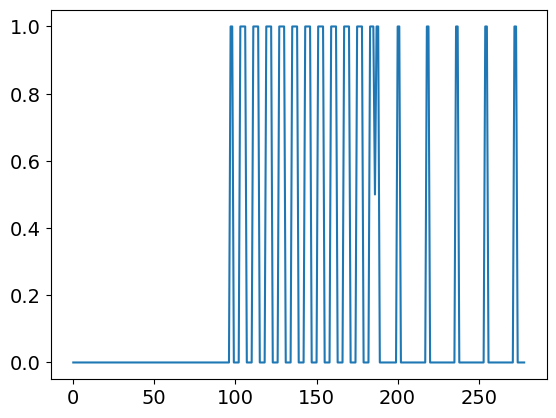

In [33]:
cc = c_time[:, bnet.output_node_inds[1]]

plt.figure()
plt.plot(tvectr, cc)
plt.show()